### Proyek Data Mining
#### Kelompok 02

<table align="left" border="1">
    <tr>
        <th style="text-align: center;">NIM</th>
        <th style="text-align: center;">Nama</th>
    </tr>
    <tr>
        <td style="text-align: left;">12S21004</td>
        <td style="text-align: left;">Estomihi Pangaribuan</td>
    </tr>
    <tr>
        <td style="text-align: left;">12S21007</td>
        <td style="text-align: left;">Dame Sitinjak</td>
    </tr>
    <tr>
        <td style="text-align: left;">12S21008</td>
        <td style="text-align: left;">Tuani Putra Manurung</td>
    </tr>
</table>

## Tahap 1: Business Understanding

### 1.Menentukan Objektif Bisnis

Tujuan utama dari proyek ini adalah untuk memprediksi harga penjualan rumah (SalePrice) secara akurat.

Dengan model prediksi harga rumah yang akurat, diharapkan dapat membantu berbagai pihak yang terlibat dalam industri perumahan, seperti:

- Pembeli rumah: Untuk memperoleh estimasi harga yang wajar untuk properti yang diinginkan.
- Penjual rumah: Untuk menentukan harga jual yang kompetitif dan realistis.
- Agen properti dan pengembang: Untuk mendukung pengambilan keputusan dalam strategi pemasaran dan memahami tren pasar.


### 2. Menetapkan Tujuan Teknis:

Tujuan teknis dari proyek ini adalah mengembangkan model prediktif untuk estimasi harga rumah (SalePrice) menggunakan algoritma Light Gradient Boosting Machine (LightGBM). Algoritma ini dipilih karena memiliki keunggulan dalam menangani dataset yang kompleks dengan fitur numerik dan kategorikal, serta kemampuannya untuk menangkap hubungan non-linear antar variabel. Dataset yang digunakan mencakup berbagai atribut properti, seperti luas tanah, jumlah kamar, usia bangunan, dan karakteristik lingkungan sekitar. Model akan dilatih untuk menghasilkan prediksi harga rumah yang akurat dengan menggunakan Root Mean Squared Logarithmic Error (RMSLE) sebagai metrik evaluasi utama untuk memastikan hasil prediksi memiliki tingkat kesalahan yang minimal. Dengan memberikan estimasi harga yang tepatdan berbasis data, model ini dirancang untuk mendukung pengambilan keputusan yang lebih baik dalam transaksi jual-beli properti.


### 3. Membuat Rencana Proyek

Pengerjaan proyek dilakukan selama 4 minggu. Berikut tahapan pengerjaan proyek:

Untuk memastikan setiap tahap dalam proyek ini terlaksana dengan baik, dirancang rencana proyek yang terstruktur dan sistematis. Rencana ini mencakup serangkaian aktivitas mulai dari pemahaman kebutuhan bisnis hingga implementasi model ke dalam sistem yang dapat digunakan secara praktis. Tabel berikut merinci tahapan proyek, aktivitas utama, serta jadwal pelaksanaannya selama empat minggu:


#### Timeline proyek

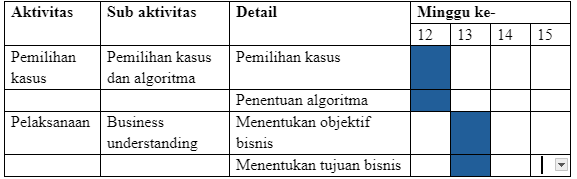

## Data Understanding

### Mengumpulkan data

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [39]:
## Import data set
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")


In [40]:
#menampilkan 10 data teratas
df.head(10)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


Terdapat 81 kolom/atribut yang ada pada data set

In [41]:
# menampilkan data di test
df_test.head(10)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [42]:
df.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Informasi yang bisa kita dapatkan dari hasil keluaran diatas adalah
1. Kolom LotFrontage hanya memiliki 1201 data dari total 1460, artinya ada nilai missing.
2. Rata-rata LotArea (luas tanah) adalah 10.516,83 kaki persegi.
3. SalePrice memiliki penyimpangan standar 79.442,50, yang menunjukkan harga rumah sangat bervariasi.
4. Harga rumah (SalePrice) terendah adalah $34.900 dan tertinggi $755.000.
5. Kuartil (25%, 50%, 75%)

- 25% data berada di bawah kuartil pertama (contohnya, 25% rumah memiliki harga di bawah $129.975).

- 50% data (median) berada di tengah (contohnya, 50% rumah memiliki harga di bawah $163.000).

- 75% data berada di bawah kuartil ketiga (contohnya, 75% rumah memiliki harga di bawah $214.000).

In [43]:
# menampilkan informasi data set
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [44]:
# cek info pada data test
df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [45]:
# baris dan kolom
df.shape


(1460, 81)

In [46]:
# Missing values
missing_train = df.isnull().sum()
print(f"Missing values in train data:\n{missing_train[missing_train > 0]}")


Missing values in train data:
LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


Dari hasil keluaran diatas, kita mendapat informasi:
- Beberapa kolom memiliki nilai missing yang sangat banyak, seperti PoolQC (1453 data hilang), MiscFeature (1406 hilang), dan Alley (1369 hilang). Ini menunjukkan bahwa banyak data pada kolom ini tidak tersedia atau tidak tercatat.
- Kolom seperti MasVnrType (872 hilang) dan FireplaceQu (690 hilang) juga memiliki nilai hilang dalam jumlah besar.
- Kolom seperti GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond                                     
- Kolom seperti MasVnrArea (8 hilang) dan Electrical (1 hilang)

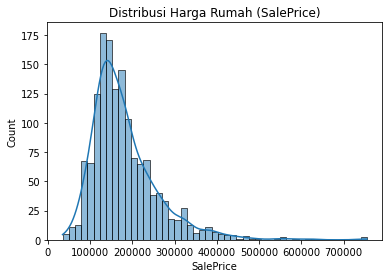

In [47]:
# Distribusi target
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribusi Harga Rumah (SalePrice)')
plt.xlabel('SalePrice')
plt.show()


Dari hasil keluaran diatas, kita mendapat beberapa informasi seperti:
- Terlihat bahwa distribusi ini miring ke kiri (left-skewed), di mana sebagian besar harga rumah berkisar di bawah 300.000, dengan puncaknya sekitar 180.000 hingga 200.000.
- Pada rentang harga 100.000 hingga 200.000, terlihat ada lebih dari 175 unit rumah, yang menunjukkan bahwa harga di kisaran ini adalah yang paling umum.
- Jumlah rumah dengan harga di atas 500.000 sangat sedikit, menunjukkan bahwa harga rumah di dalam dataset ini cenderung terfokus pada kisaran menengah hingga tinggi.
- Sebagian besar harga berada di antara 100.000 dan 300.000, dengan sedikit sekali rumah berharga di bawah 100.000 atau di atas 500.000.


In [48]:
# Kita pilih hanya kolom numerik
numeric_data = df.select_dtypes(include=['int64', 'float64'])

# Correlation Heatmap
corr = numeric_data.corr()
# mencari korelasi dengan target variable (SalePrice)
corr_saleprice = corr['SalePrice'].sort_values(ascending=False)
print(f"Korelasi dengan SalePrice:\n{corr_saleprice}")


Korelasi dengan SalePrice:
SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvG

Koefisien korelasi berkisar antara -1 hingga +1.

Jika mendekati +1, ini menandakan bahwa terdapat korelasi positif yang kuat.Jadi, kita dapat melihat bahwa terdapat korelasi positif yang kuat antara SalesPrice dengan OverallQual, GrLivArea dan yang lainya.

Jika mendekati -1, berarti terdapat korelasi negatif yang kuat. Jika mendekati 0, berarti tidak terdapat korelasi.. Kita dapa melihat bahwa terdapat korelasi negatif antara SalesPrice dengan BsmtFinSF2,  BsmtHalfBath dan yang lainya.

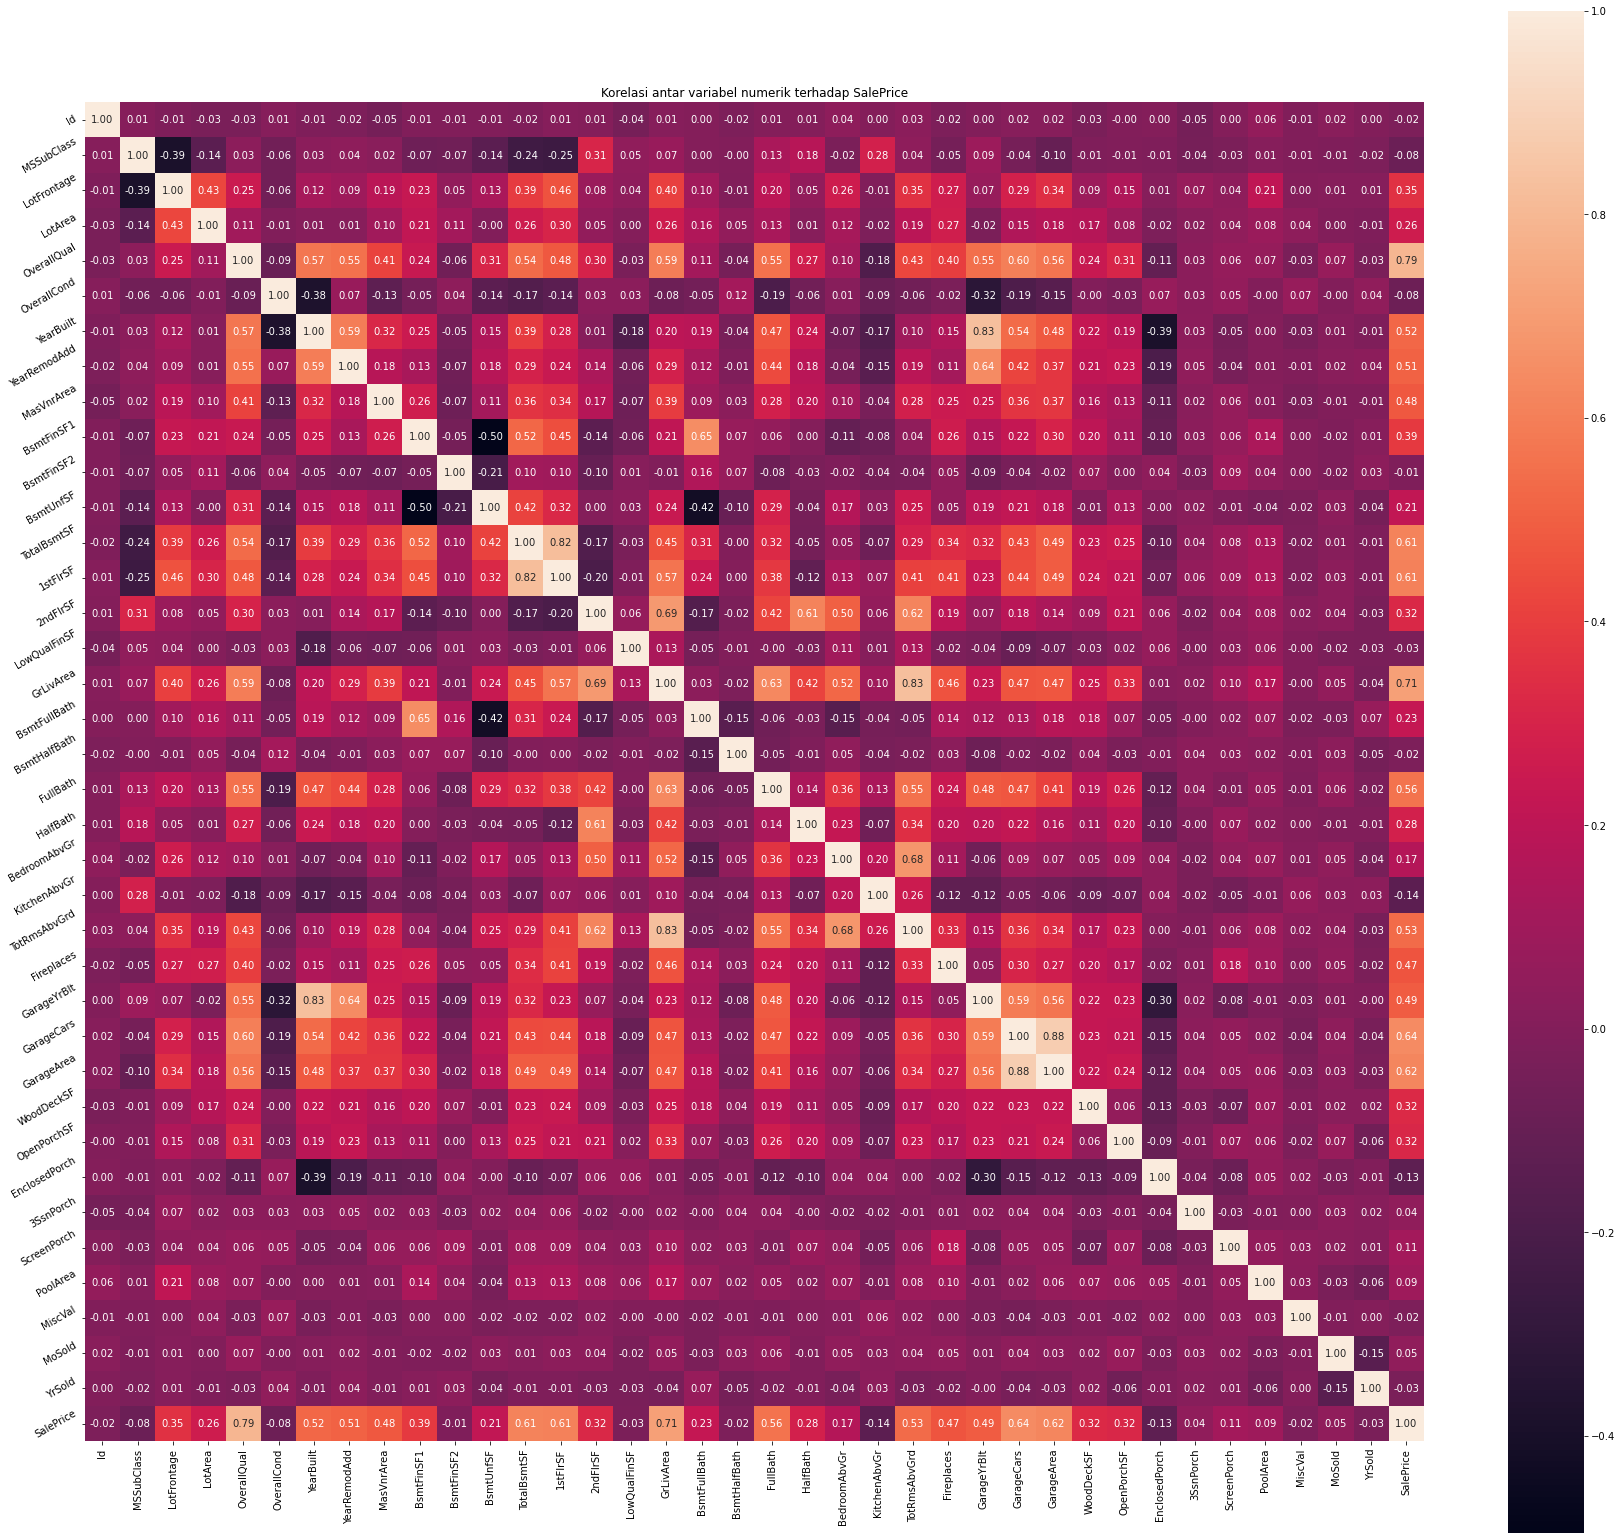

In [49]:
plt.figure(figsize=(30,28))
plt.title('Korelasi antar variabel numerik terhadap SalePrice')
a=sns.heatmap(corr, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()


Interpretasi
Dari Heat Map korelasi di atas, kita dapat menyimpulkan bahwa:-

Kolom SalesPrice berkolerasi positif dengan LotFrontage, LotArea dan berbagai kolom yang lain.

Kemudian kolomPrice berkolerasi negatif dengan YtSold, MiscVal, EnclosedPorch dan kolom yang lain

## Preprocessing-Data

### 1. Membersihkan data train

In [50]:
train_missing_value = df.isna().sum()
train_missing_value.to_csv('train missing value.csv')


In [51]:
x = pd.read_csv('train missing value.csv')
x[x['0'] > 0]


,Unnamed: 0,0
3,LotFrontage,259
6,Alley,1369
25,MasVnrType,8
26,MasVnrArea,8
30,BsmtQual,37
31,BsmtCond,37
32,BsmtExposure,38
33,BsmtFinType1,37
35,BsmtFinType2,38
42,Electrical,1


In [52]:
print(f'sum missing values: {df.isna().sum().sum().item()}')
print(f'duplicated values: {df.duplicated().sum().item()}')


sum missing values: 6965
duplicated values: 0


In [53]:
df.sample(5)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1092,1093,50,RL,60.0,8400,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,136500
923,924,120,RL,50.0,8012,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,193000
687,688,160,FV,NaN,5105,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,148800
843,844,90,RL,80.0,8000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,141000
1286,1287,20,RL,NaN,9790,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,143000


In [54]:
df.drop(columns=['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature'], 
        inplace=True)


In [55]:
df.sample(5)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
924,20,RL,79.0,10240,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2006,WD,Normal,207500
560,20,RL,NaN,11341,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,95,0,0,5,2010,WD,Normal,121500
367,80,RL,101.0,9150,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,165000
324,80,RL,96.0,11275,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,6,2010,WD,Normal,242000
387,80,RL,72.0,7200,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2009,WD,Abnorml,125000


In [56]:
from sklearn.impute import SimpleImputer

# Step 1: Separate the columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Step 2: Impute missing values for numerical columns using median
imputer_median = SimpleImputer(strategy='median')
df[numerical_cols] = imputer_median.fit_transform(df[numerical_cols])

# Step 3: Impute missing values for categorical columns using most_frequent
imputer_most = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_most.fit_transform(df[categorical_cols])


In [57]:
print(f'sum missing values: {df.isna().sum().sum().item()}')
print(f'duplicated values: {df.duplicated().sum().item()}')


sum missing values: 0
duplicated values: 0


In [58]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   float64
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   float64
 16  OverallCond    1460 non-null   float64
 17  YearBuilt      1460 non-null   float64
 18  YearRemo

### 2. Membersihkan data test

In [59]:
df_test.sample(10)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
21,1482,120,RL,41.0,7132,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
392,1853,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
530,1991,120,RL,55.0,7301,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2008,New,Partial
842,2303,20,RL,71.0,9254,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal
1038,2499,30,RL,NaN,11515,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
948,2409,20,RL,70.0,9100,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal
70,1531,50,RM,60.0,4800,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2010,COD,Abnorml
1379,2840,20,RL,NaN,8685,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal
1253,2714,160,FV,24.0,2544,Pave,Pave,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
513,1974,60,RL,85.0,10574,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal


In [60]:
df_test.drop(columns=['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature'], inplace=True)


In [61]:
df_test.sample(10)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
630,190,RM,63.0,11426,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,172,109,0,0,0,0,6,2008,WD,Normal
1426,30,RM,50.0,7288,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,8,2006,WD,AdjLand
649,30,RL,55.0,7111,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,0,7,2008,WD,Normal
1085,20,RL,80.0,8240,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,6,2007,WD,Normal
513,60,RL,85.0,10574,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,142,0,0,0,0,0,7,2008,WD,Normal
318,20,RL,75.0,9533,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,100,0,0,0,0,8,2009,ConLD,Normal
514,20,RL,106.0,12720,Pave,Reg,HLS,AllPub,Inside,Mod,...,65,0,0,216,144,0,2,2008,WD,Normal
149,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,4,2010,WD,Normal
1180,20,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,3,2006,WD,Normal
1134,20,RL,NaN,6718,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,28,0,0,0,0,0,1,2007,WD,Normal


In [62]:
# Step 1: Separate the columns
numerical_cols = df_test.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df_test.select_dtypes(include=['object']).columns

# Step 2: Impute missing values for numerical columns using median
imputer_median = SimpleImputer(strategy='median')
df_test[numerical_cols] = imputer_median.fit_transform(df_test[numerical_cols])

# Step 3: Impute missing values for categorical columns using most_frequent
imputer_most = SimpleImputer(strategy='most_frequent')
df_test[categorical_cols] = imputer_most.fit_transform(df_test[categorical_cols])


In [63]:
print(f'sum missing values: {df_test.isna().sum().sum().item()}')
print(f'duplicated values: {df_test.duplicated().sum().item()}')


sum missing values: 0
duplicated values: 0


In [64]:
df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   float64
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   float64
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1459 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   float64
 16  OverallCond    1459 non-null   float64
 17  YearBuilt      1459 non-null   float64
 18  YearRemo

### 1. Ecoding

In [65]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['MSZoning'] = encoder.fit_transform(df['MSZoning'])
df['Street'] = encoder.fit_transform(df['Street'])
df['LotShape'] = encoder.fit_transform(df['LotShape'])
df['LandContour'] = encoder.fit_transform(df['LandContour'])
df['Utilities'] = encoder.fit_transform(df['Utilities'])
df['LotConfig'] = encoder.fit_transform(df['LotConfig'])
df['LandSlope'] = encoder.fit_transform(df['LandSlope'])
df['Neighborhood'] = encoder.fit_transform(df['Neighborhood'])
df['Condition1'] = encoder.fit_transform(df['Condition1'])
df['Condition2'] = encoder.fit_transform(df['Condition2'])
df['BldgType'] = encoder.fit_transform(df['BldgType'])
df['HouseStyle'] = encoder.fit_transform(df['HouseStyle'])
df['RoofStyle'] = encoder.fit_transform(df['RoofStyle'])
df['RoofMatl'] = encoder.fit_transform(df['RoofMatl'])
df['Exterior1st'] = encoder.fit_transform(df['Exterior1st'])
df['Exterior2nd'] = encoder.fit_transform(df['Exterior2nd'])
df['MasVnrType'] = encoder.fit_transform(df['MasVnrType'])
df['ExterQual'] = encoder.fit_transform(df['ExterQual'])
df['ExterCond'] = encoder.fit_transform(df['ExterCond'])
df['Foundation'] = encoder.fit_transform(df['Foundation'])
df['BsmtQual'] = encoder.fit_transform(df['BsmtQual'])
df['BsmtCond'] = encoder.fit_transform(df['BsmtCond'])
df['BsmtExposure'] = encoder.fit_transform(df['BsmtExposure'])
df['BsmtFinType1'] = encoder.fit_transform(df['BsmtFinType1'])
df['BsmtFinType2'] = encoder.fit_transform(df['BsmtFinType2'])
df['Heating'] = encoder.fit_transform(df['Heating'])
df['HeatingQC'] = encoder.fit_transform(df['HeatingQC'])
df['CentralAir'] = encoder.fit_transform(df['CentralAir'])
df['Electrical'] = encoder.fit_transform(df['Electrical'])
df['KitchenQual'] = encoder.fit_transform(df['KitchenQual'])
df['Functional'] = encoder.fit_transform(df['Functional'])
df['FireplaceQu'] = encoder.fit_transform(df['FireplaceQu'])
df['GarageType'] = encoder.fit_transform(df['GarageType'])
df['GarageFinish'] = encoder.fit_transform(df['GarageFinish'])
df['GarageQual'] = encoder.fit_transform(df['GarageQual'])
df['GarageCond'] = encoder.fit_transform(df['GarageCond'])
df['PavedDrive'] = encoder.fit_transform(df['PavedDrive'])
df['SaleType'] = encoder.fit_transform(df['SaleType'])
df['SaleCondition'] = encoder.fit_transform(df['SaleCondition'])


### 2. Membagi Input dan Output

In [66]:
# memisahkan dataset menjadi fitur (input) dan target (output)
x = df.iloc[ : , :-1]
y = df.iloc[ : , -1]


In [67]:
x


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60.0,3,65.0,8450.0,1,3,3,0,4,0,...,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,8,4
1,20.0,3,80.0,9600.0,1,3,3,0,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,8,4
2,60.0,3,68.0,11250.0,1,0,3,0,4,0,...,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,8,4
3,70.0,3,60.0,9550.0,1,0,3,0,0,0,...,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,8,0
4,60.0,3,84.0,14260.0,1,0,3,0,2,0,...,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,3,62.0,7917.0,1,3,3,0,4,0,...,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,8,4
1456,20.0,3,85.0,13175.0,1,3,3,0,4,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,8,4
1457,70.0,3,66.0,9042.0,1,3,3,0,4,0,...,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0,8,4
1458,20.0,3,68.0,9717.0,1,3,3,0,4,0,...,0.0,112.0,0.0,0.0,0.0,0.0,4.0,2010.0,8,4


In [68]:
y


0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

### 3. Scaling

In [69]:
# berguna untuk menormalisasi data fitur (input) agar berada dalam rentang nilai 0 dan 1  
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
scaler = MinMaxScaler()

x = scaler.fit_transform(x)


In [70]:
x


array([[0.23529412, 0.75      , 0.15068493, ..., 0.5       , 1.        ,
        0.8       ],
       [0.        , 0.75      , 0.20205479, ..., 0.25      , 1.        ,
        0.8       ],
       [0.23529412, 0.75      , 0.1609589 , ..., 0.5       , 1.        ,
        0.8       ],
       ...,
       [0.29411765, 0.75      , 0.15410959, ..., 1.        , 1.        ,
        0.8       ],
       [0.        , 0.75      , 0.1609589 , ..., 1.        , 1.        ,
        0.8       ],
       [0.        , 0.75      , 0.18493151, ..., 0.5       , 1.        ,
        0.8       ]])

In [71]:
# Mengubah variabel target y menjadi bentuk dataframe.
y_df = y.to_frame()

y = scaler.fit_transform(y_df)


In [72]:
y


array([[0.24107763],
       [0.20358284],
       [0.26190807],
       ...,
       [0.321622  ],
       [0.14890293],
       [0.15636717]])

### Train & Valid:

In [73]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)


In [74]:
# print presentasi data
print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)


(1168, 75)
(292, 75)
(1168, 1)
(292, 1)
